# Image Downloader

In [1]:
from fastai import *
from fastai.vision import *

In [2]:
folder = 'pick_up_trucks'
file = 'pick_up_trucks.txt'

In [3]:
folder = 'semi_trucks'
file = 'semi_truck.txt'

In [4]:
folder = 'sedan_cars'
file = 'sedan_car.txt'

In [5]:
path = Path('data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

# Download Images

In [ ]:
download_images(path/file, dest, max_pics=200)

In [6]:
classes = ['pick_up_trucks','semi_trucks','sedan_cars']

In [7]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

pick_up_trucks


/usr/local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/usr/local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


semi_trucks


sedan_cars


/usr/local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/usr/local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/usr/local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file '/home/work/fast_ai/data/sedan_cars/00000087.jpg'
cannot identify image file '/home/work/fast_ai/data/sedan_cars/00000104.jpg'


/usr/local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/usr/local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


image file is truncated


In [8]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, 
                                  ds_tfms=get_transforms(), size=224)

/usr/local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


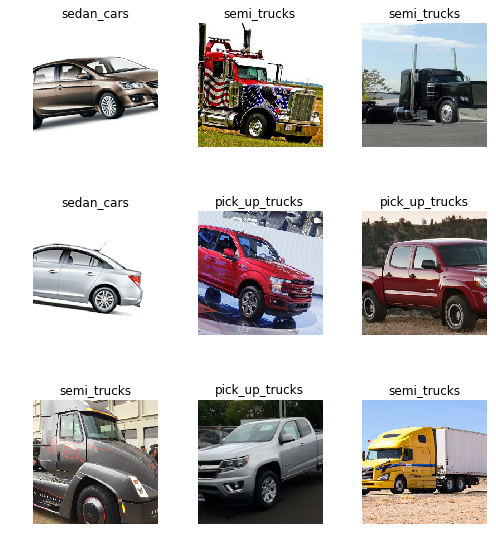

In [11]:
data.show_batch(rows=3, figsize=(7,8))

In [10]:
data.classes, data.c

(['pick_up_trucks', 'sedan_cars', 'semi_trucks'], 3)